<a href="https://colab.research.google.com/github/apoorwagupta/Cyberbullying-Detection-Identifying-Hate-Speech-/blob/main1/Cyberbullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing relevant packages

In [2]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
pip install numpy

In [4]:
pip install pandas

In [5]:
pip install nltk

In [6]:
pip install matplotlib

In [7]:
pip install imblearn

# Importing

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

# Loading Data

In [30]:
url = 'https://drive.google.com/uc?export=download&id=12fBlhsa5GIdtme1jT3KlPPIgIdjzqhv1'
df = pd.read_json(url, lines= True,orient='columns')
df.head(10)

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN
5,Ill save you the trouble sister. Here comes a ...,"{'notes': '', 'label': ['1']}",NaN
6,Im dead serious.Real athletes never cheat don...,"{'notes': '', 'label': ['1']}",NaN
7,...go absolutely insane.hate to be the bearer ...,"{'notes': '', 'label': ['1']}",NaN
8,Lmao im watching the same thing ahaha. The ga...,"{'notes': '', 'label': ['1']}",NaN
9,LOL no he said What do you call a jail cell ...,"{'notes': '', 'label': ['1']}",NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   content     20001 non-null  object 
 1   annotation  20001 non-null  object 
 2   extras      0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 468.9+ KB


In [31]:
df['annotation'] = df['annotation'].apply(lambda x: 1 if x['label'][0] == '1' else 0)

In [32]:
df.drop(['extras'],axis = 1,inplace = True)
df

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [33]:
df.shape

(20001, 2)

# Visualization

<Axes: xlabel='annotation'>

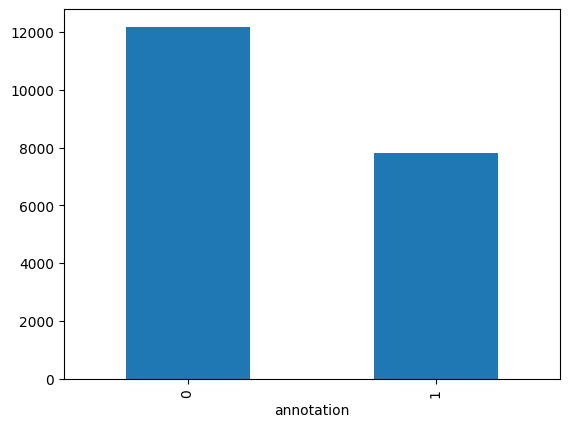

In [34]:
df['annotation'].value_counts().sort_index().plot.bar()

In [36]:
#Biasness
print("No Cybertrolling: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Cybertrolling: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")

No Cybertrolling:  60.89195540222989 %
Cybertrolling:  39.10804459777012 %


The dataset is balanced

# Preprocessing

In [37]:
nltk.download('stopwords')
stop = stopwords.words('english')

regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df ['content_without_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df ['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))
del df['content_without_stopwords']
del df['content']
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,annotation,content_without_puncs
0,1,Get fucking real dude
1,1,She dirty come crook Rengel Dems fucking corru...
2,1,fuck up I could day too Lets hour Ping later s...
3,1,Dude dont finish enclosing fucking showers I h...
4,1,WTF talking Men No men thats menage thats gay
...,...,...
19996,0,I dont But complaining going do
19997,0,Bahah yeah im totally gonna get pissed talking...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,Whats something unique Ohio


In [38]:
#Stemming
porter_stemmer = PorterStemmer()
#punctuations
nltk.download('punkt')
tok_list = []
size = df.shape[0]

for i in range(size):
  word_data = df['content_without_puncs'][i]
  nltk_tokens = nltk.word_tokenize(word_data)
  final = ''
  for w in nltk_tokens:
    final = final + ' ' + porter_stemmer.stem(w)
  tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,annotation,content_tokenize
0,1,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay
...,...,...
19996,0,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio


In [39]:
noNums = []
for i in range(len(df)):
  noNums.append(''.join([i for i in df['content_tokenize'][i] if not i.isdigit()]))

df['content'] = noNums
df

,annotation,content_tokenize,content
0,1,get fuck real dude,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay,wtf talk men no men that menag that gay
...,...,...,...
19996,0,i dont but complain go do,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio,what someth uniqu ohio


In [40]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

In [41]:
print(tfIdf)

  (0, 3598)	0.5682792040556577
  (0, 10534)	0.6408032598619846
  (0, 4665)	0.3314842764826402
  (0, 4896)	0.3956616014132561
  (1, 7497)	0.1421522208901913
  (1, 7670)	0.18997382467613527
  (1, 10707)	0.3380770158779807
  (1, 7868)	0.17712641457020445
  (1, 6881)	0.2707206754001475
  (1, 2649)	0.3478358132370042
  (1, 3127)	0.36956626902789813
  (1, 10686)	0.36956626902789813
  (1, 2791)	0.3609013757539863
  (1, 2453)	0.20014266836955738
  (1, 3306)	0.294004579420996
  (1, 11402)	0.24231137330135857
  (1, 4665)	0.12302268120056382
  (2, 5648)	0.26264752682375
  (2, 1476)	0.2858475342270202
  (2, 14420)	0.28761927584628644
  (2, 11156)	0.4130661580674724
  (2, 7317)	0.3061308801267633
  (2, 9784)	0.38298243181872793
  (2, 5956)	0.28144866948736874
  (2, 7434)	0.24199503289435126
  :	:
  (19997, 8527)	0.362558005670761
  (19997, 14527)	0.1829917686470462
  (19997, 364)	0.2524980709313037
  (19997, 8632)	0.19487099515279527
  (19997, 5039)	0.21529577669215724
  (19997, 14639)	0.1516281744

In [42]:
print(tfIdf.shape) # means total rows  20001 with 14783 features

(20001, 14783)


In [44]:
df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"]) #for second entry only(just to check if working)
df2 = df2.sort_values('TF-IDF', ascending=False)
print (df2.head(10))

         TF-IDF
sched  0.413066
ping   0.382982
later  0.306131
write  0.287619
book   0.285848
hour   0.281449
here   0.262648
let    0.241995
up     0.237401
could  0.223151


In [46]:
dfx = pd.DataFrame(tfIdf.toarray(), columns = tfIdfVectorizer.get_feature_names_out())
print(dfx)

        aa  aaaaaaaaaa  aaaaaanndgummi  aaaagh  aaaawwwww  aaand  \
0      0.0         0.0             0.0     0.0        0.0    0.0   
1      0.0         0.0             0.0     0.0        0.0    0.0   
2      0.0         0.0             0.0     0.0        0.0    0.0   
3      0.0         0.0             0.0     0.0        0.0    0.0   
4      0.0         0.0             0.0     0.0        0.0    0.0   
...    ...         ...             ...     ...        ...    ...   
19996  0.0         0.0             0.0     0.0        0.0    0.0   
19997  0.0         0.0             0.0     0.0        0.0    0.0   
19998  0.0         0.0             0.0     0.0        0.0    0.0   
19999  0.0         0.0             0.0     0.0        0.0    0.0   
20000  0.0         0.0             0.0     0.0        0.0    0.0   

       aaanyyywhoooooooo  aaargh  aaarrrg  aah  ...  zon  zone  zoo  zoom  \
0                    0.0     0.0      0.0  0.0  ...  0.0   0.0  0.0   0.0   
1                    0.0     

In [49]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [50]:
#top 25 words
display_scores(tfIdfVectorizer, tfIdf)

hate                                               Score: 533.8157298036014
fuck                                               Score: 503.76150769255435
damn                                               Score: 482.3875012051478
suck                                               Score: 407.37790877127185
ass                                                Score: 337.54089621427744
that                                               Score: 311.6250930420745
lol                                                Score: 298.0085779872157
im                                                 Score: 296.0216055277791
like                                               Score: 287.8183474868775
you                                                Score: 284.7850587424088
it                                                 Score: 254.75722294501585
get                                                Score: 253.19747902607998
what                                               Score: 221.43673623523864
know  

In [51]:
X=tfIdf.toarray()
y = np.array(df.annotation.tolist())
#Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000, 14783)
(16000,)
(4001, 14783)
(4001,)


In [52]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9750 6250]]


In [53]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [2429 1572]]


In [54]:
#Random oversampling on training data
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [55]:
print(X_over.shape)
print(y_over.shape)

(19500, 14783)
(19500,)


In [56]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9750 9750]]


# Training and Calculating Scores

In [61]:
from sklearn.metrics import precision_recall_curve

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix

def getStatsFromModel(model):
    # Predict labels and probabilities
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Print classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    plt.figure()
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower left")
    plt.show()

    # Plot ROC Curve and Calculate AUC
    logit_roc_auc = roc_auc_score(y_test, y_scores)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    # Print Confusion Matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


## Supervised Methods

###Naive Bayes

Score: 0.6160959760059985
Confusion Matrix: 
 [[ 924 1505]
 [  31 1541]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.38      0.55      2429
           1       0.51      0.98      0.67      1572

    accuracy                           0.62      4001
   macro avg       0.74      0.68      0.61      4001
weighted avg       0.79      0.62      0.59      4001



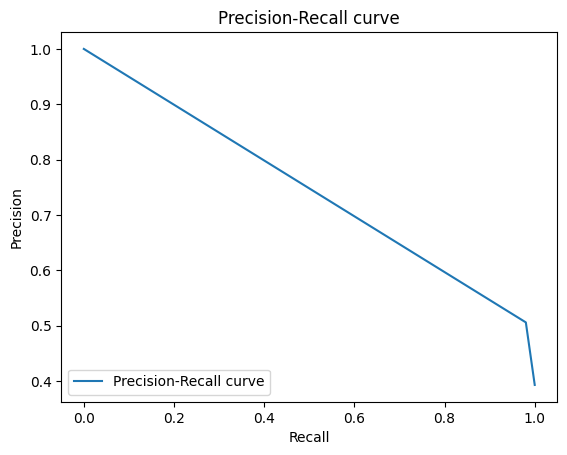

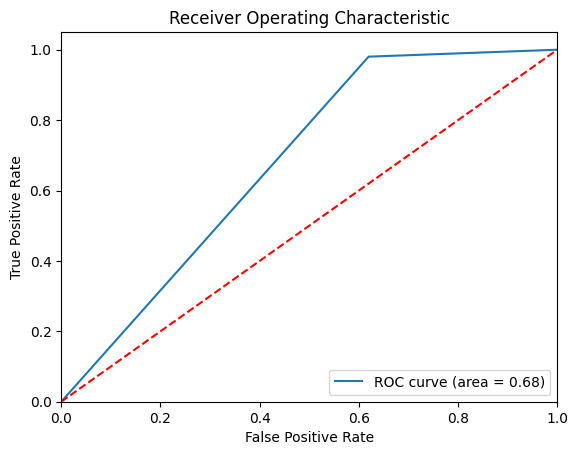

Confusion Matrix:
 [[ 924 1505]
 [  31 1541]]


In [65]:

gnb = GaussianNB()
gnbmodel = gnb.fit(X_over, y_over)
y_pred = gnbmodel.predict(X_test)
print ("Score:", gnbmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(gnb)

Accuracy:  0.8030492376905773
Confusion Matrix: 
 [[1919  510]
 [ 278 1294]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      2429
           1       0.72      0.82      0.77      1572

    accuracy                           0.80      4001
   macro avg       0.80      0.81      0.80      4001
weighted avg       0.81      0.80      0.80      4001



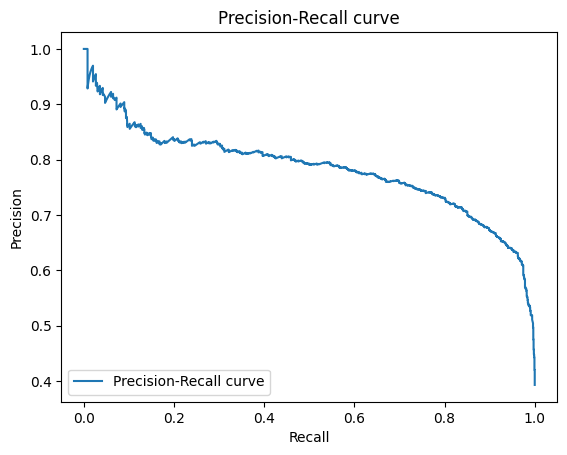

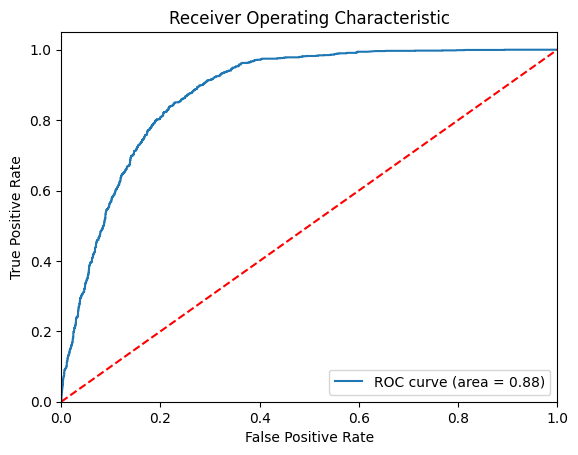

Confusion Matrix:
 [[1919  510]
 [ 278 1294]]


In [69]:
lgr = LogisticRegression(max_iter=500)
lgr.fit(X_over, y_over)
y_pred = lgr.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(lgr)

Accuracy:  0.8567858035491127
Confusion Matrix: 
 [[1913  516]
 [  57 1515]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      2429
           1       0.75      0.96      0.84      1572

    accuracy                           0.86      4001
   macro avg       0.86      0.88      0.86      4001
weighted avg       0.88      0.86      0.86      4001



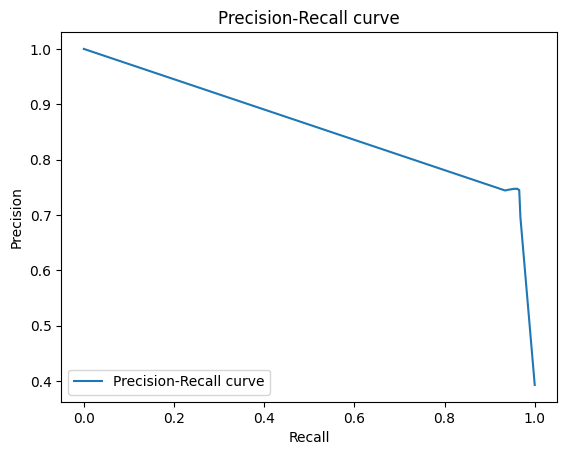

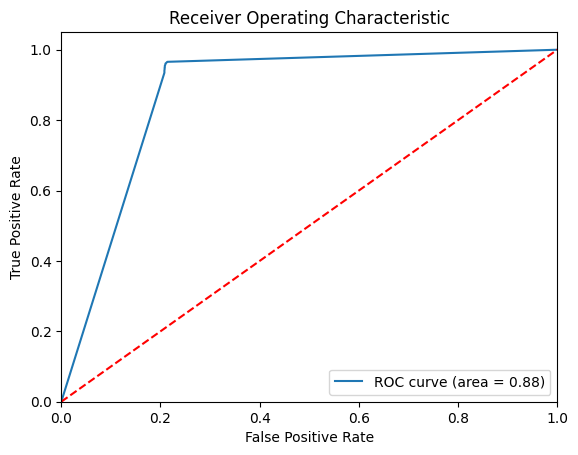

Confusion Matrix:
 [[1913  516]
 [  57 1515]]


In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(X_over, y_over)
y_pred = dtc.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(dtc)

## Ensemble Methods

Accuracy:  0.7205698575356161
Confusion Matrix: 
 [[1737  692]
 [ 426 1146]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76      2429
           1       0.62      0.73      0.67      1572

    accuracy                           0.72      4001
   macro avg       0.71      0.72      0.71      4001
weighted avg       0.73      0.72      0.72      4001



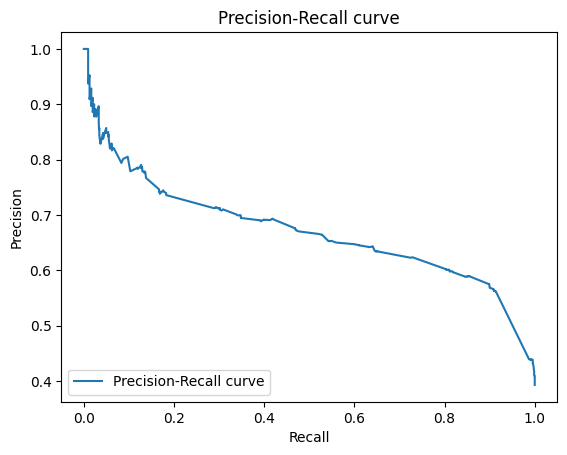

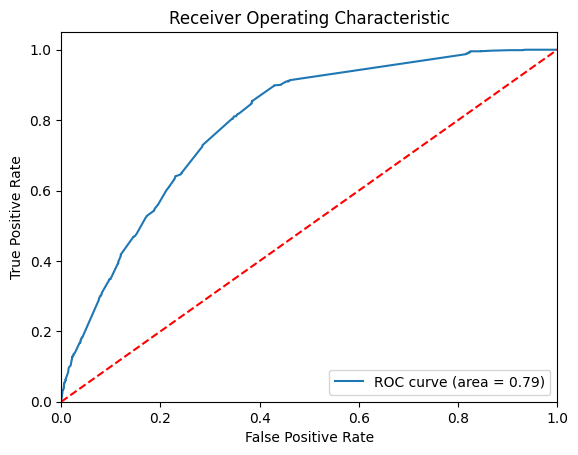

Confusion Matrix:
 [[1737  692]
 [ 426 1146]]


In [70]:
#Ensemble methods from here
abc = AdaBoostClassifier()
abc.fit(X_over, y_over)
y_pred = abc.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(abc)

In [ ]:
rfc = RandomForestClassifier(verbose=True) #uses randomized decision trees
rfcmodel = rfc.fit(X_over, y_over)
y_pred = rfc.predict(X_test)
print ("Score:", rfcmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(rfc)